In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

# Read country-level geomtery with GEOID 

Counties boundary geometry from Census [TIGER/Line Shapefiles](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2024&layergroup=Counties+%28and+equivalent%29)
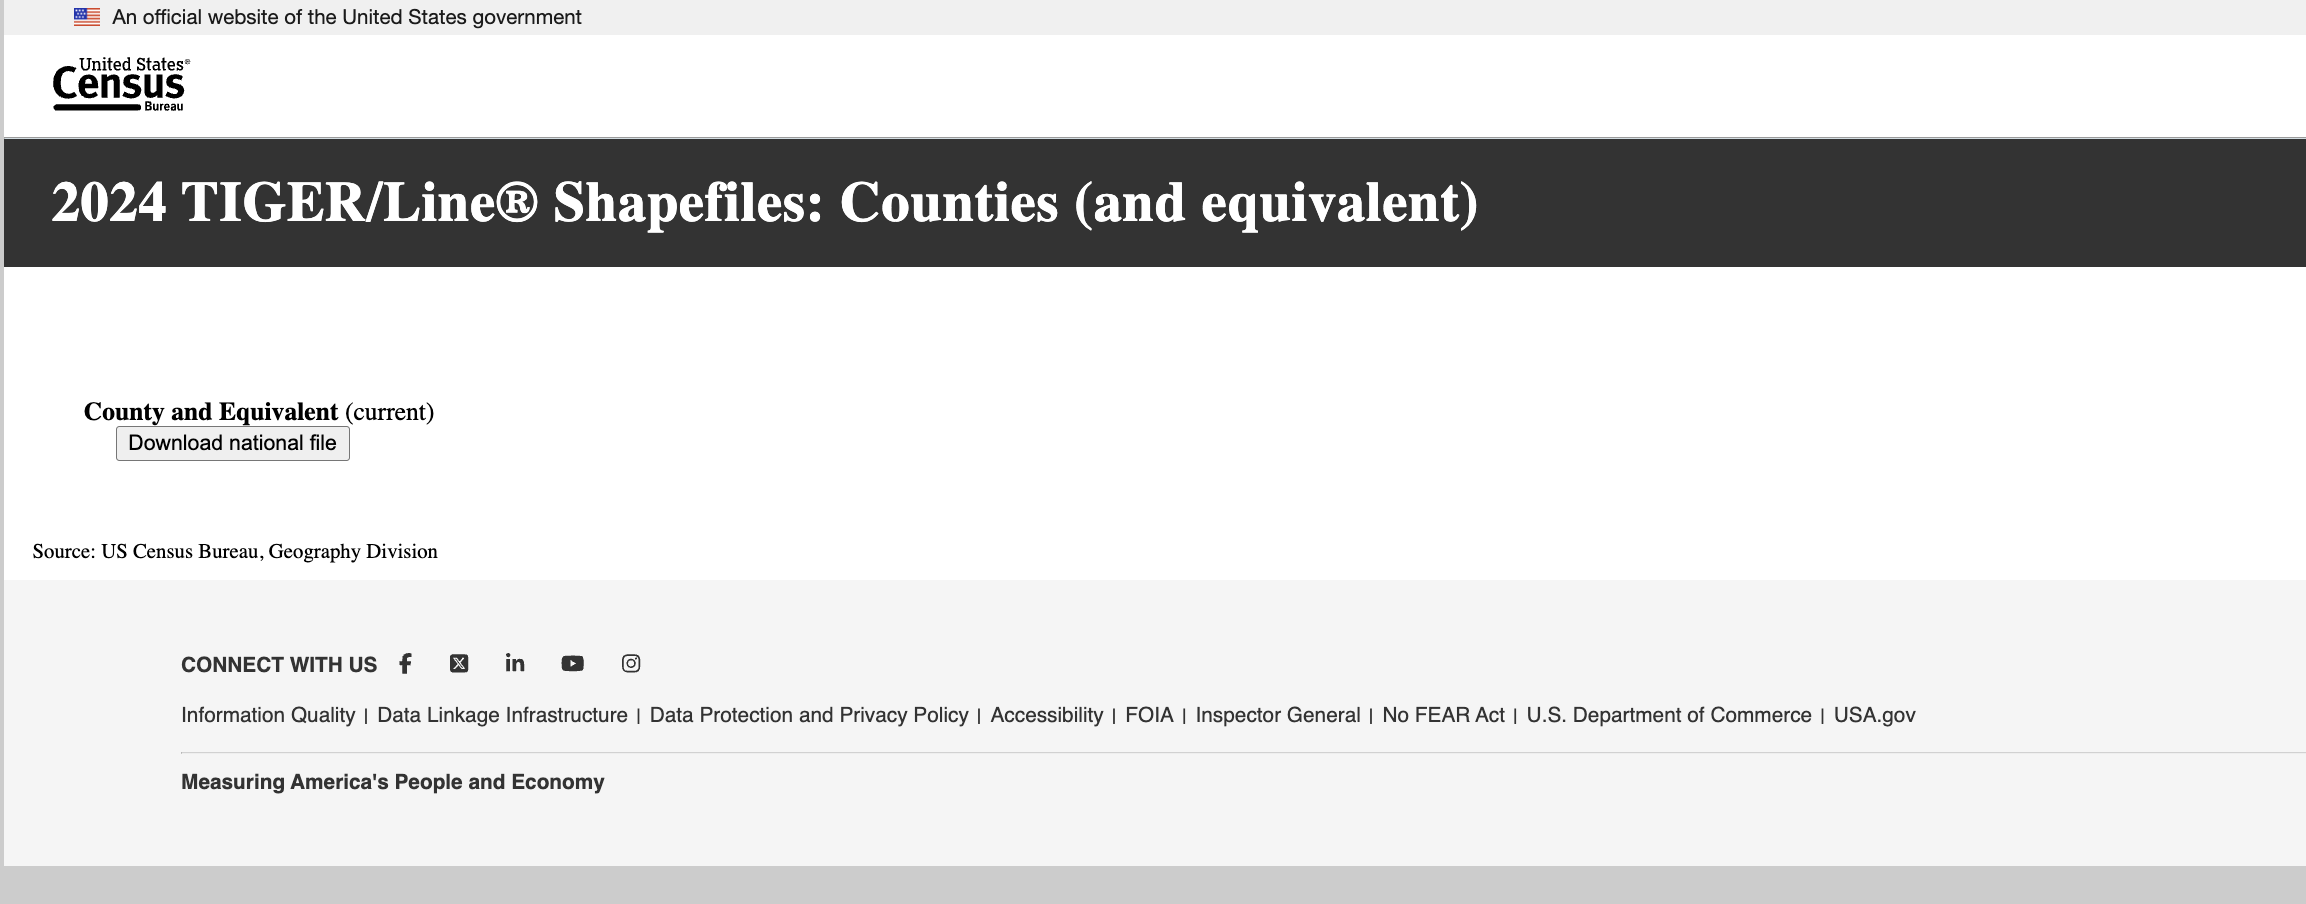

In [6]:
counties_us = gpd.read_file("/Users/houpuli/Downloads/tl_2024_us_counties.zip")
counties_us = counties_us.to_crs(epsg=4326)
counties_us

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477563042,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55525 41.82892, -96.55524 41.827..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680980773,61564428,+46.2946377,-123.4244583,"POLYGON ((-123.72756 46.26449, -123.72756 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818941,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,NaN,A,2169269508,22850511,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52329, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645201,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,0500000US13123,Gilmer,Gilmer County,06,H1,G4020,NaN,NaN,NaN,A,1103804462,12337139,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,0500000US27135,Roseau,Roseau County,06,H1,G4020,NaN,NaN,NaN,A,4329782927,16924046,+48.7610683,-095.8215042,"POLYGON ((-95.25858 48.88666, -95.25708 48.885..."
3232,28,089,00695768,28089,0500000US28089,Madison,Madison County,06,H1,G4020,298,27140,NaN,A,1849796735,72079469,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40025, -90.14890 32.400..."
3233,48,227,01383899,48227,0500000US48227,Howard,Howard County,06,H1,G4020,NaN,13700,NaN,A,2333034781,8846149,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [11]:
counties_us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
selected_counties_id = ['55079','55133','34039','34023','08031','48029'] 

for county_id in selected_counties_id:
    print(counties_us[counties_us['GEOID']==county_id]['NAME'].values[0])

Milwaukee
Waukesha
Union
Middlesex
Denver
Bexar


In [10]:
selected_counties = counties_us[counties_us['GEOID'].isin(selected_counties_id)]
selected_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
475,34,039,00882235,34039,0500000US34039,Union,Union County,06,H1,G4020,408,35620,35084,A,266165786,6839053,+40.6598707,-074.3086957,"POLYGON ((-74.20067 40.63290, -74.20240 40.631..."
615,48,029,01383800,48029,0500000US48029,Bexar,Bexar County,06,H1,G4020,484,41700,NaN,A,3212517260,40698142,+29.4486708,-098.5201465,"POLYGON ((-98.32720 29.20987, -98.32725 29.209..."
623,08,031,00198131,08031,0500000US08031,Denver,Denver County,06,H6,G4020,216,19740,NaN,C,396460145,4275563,+39.7618502,-104.8811054,"MULTIPOLYGON (((-104.93414 39.70018, -104.9328..."
687,55,079,01581100,55079,0500000US55079,Milwaukee,Milwaukee County,06,H1,G4020,376,33340,NaN,A,625371986,2455452227,+42.9126431,-087.8623115,"POLYGON ((-87.95925 43.19241, -87.95768 43.192..."
1035,34,023,00882230,34023,0500000US34023,Middlesex,Middlesex County,06,H1,G4020,408,35620,29484,A,800957688,35286675,+40.4396214,-074.4074303,"POLYGON ((-74.52668 40.55949, -74.52668 40.559..."
3088,55,133,01581126,55133,0500000US55133,Waukesha,Waukesha County,06,H1,G4020,376,33340,NaN,A,1423780693,79806617,+43.0183677,-088.3042404,"POLYGON ((-88.06725 43.01640, -88.06725 43.016..."


In [13]:
selected_counties.explore()

# Read in POI data

In [2]:
poi_points_us = pd.read_csv("/Users/houpuli/Redlining Lab Dropbox/Redlining Lab Team Folder/POI Dataset/combined_places_us.csv")
poi_points_us

,id,updatetime,version,names,cat_main,cat_alt,confidence,websites,address,bbox,geometry
0,tmp_500EB741CECBFF561AE1B94216F61766,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""7-Eleven"",""language"":""en""}]}",NaN,NaN,0.600000,NaN,"[{""locality"":""Wheaton"",""postcode"":""60187"",""fre...","{""minx"":-88.1112233,""maxx"":-88.1112233,""miny"":...",0x0101000000680355481E0756C00806103E94EE4440
1,tmp_DA8054A688D44D9E0EBE644B4D7FFA47,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cretex Specialty Products...",structural_engineer,"[""professional_services"",""shopping""]",0.606087,"[""http://www.cretexseals.com""]","[{""postcode"":""53188"",""freeform"":""N26W23800 Com...","{""minx"":-88.2207513,""maxx"":-88.2207513,""miny"":...",0x01010000002B830FCA200E56C01E8CD82780884540
2,tmp_BA9A84ABF48346A69ED91148D4C27D99,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Bao Mi"",""language"":""local...",restaurant,NaN,0.980592,NaN,"[{""locality"":""New Orleans"",""postcode"":""70112-2...","{""minx"":-90.0829409,""maxx"":-90.0829409,""miny"":...",0x01010000000D4059E74E8556C01E030D912EF53D40
3,tmp_711963EE7AEC75283BE841261ACB8C2C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Chevron Station Russellvi...",NaN,NaN,0.600000,NaN,"[{""locality"":""Russellville"",""postcode"":""35654""...","{""minx"":-87.6751775,""maxx"":-87.6751775,""miny"":...",0x0101000000AF5FB01B36EB55C038D32934B54B4140
4,tmp_F06F089E8728025E4177EFBB3AF322A7,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Mobil"",""language"":""local""}]}",gas_station,"[""convenience_store"",""laboratory_testing""]",0.978300,"[""http://www.mobil.com""]","[{""locality"":""Sturgeon Bay"",""postcode"":""54235-...","{""minx"":-87.366155,""maxx"":-87.366155,""miny"":44...",0x0101000000159161156FD755C0147B681F2B6C4640
...,...,...,...,...,...,...,...,...,...,...,...
12792522,tmp_4E63260021AAA79A95CC1A605C8C950C,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Cook's Body & Mechanical""...",convenience_store,"[""automotive"",""automotive_repair""]",0.774474,"[""http://www.cooks1stopshop.com""]","[{""locality"":""St Paul"",""postcode"":""55109-2127""...","{""minx"":-93.024879,""maxx"":-93.024879,""miny"":45...",0x0101000000DCD6169E974157C00B0DC4B299814640
12792523,tmp_8640AFFBC0A4F7701C6F39F9ADC5D585,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Dick Smith Park"",""languag...",park,"[""public_plaza"",""topic_concert_venue""]",0.968883,"[""https://www.dicksmith.com.au""]","[{""postcode"":""64844"",""country"":""US""}]","{""minx"":-94.25566,""maxx"":-94.25566,""miny"":36.9...",0x01010000004EB9C2BB5C9057C0C68844A165754240
12792524,tmp_7444C2F2F44683A875C7FCF82F66FAF6,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""C&C Metal Products LLC"",""...",NaN,NaN,0.758897,NaN,"[{""locality"":""Saint Amant"",""postcode"":""70774"",...","{""minx"":-90.859734,""maxx"":-90.859734,""miny"":30...",0x01010000009850C1E105B756C0857CD0B359393E40
12792525,tmp_14B3B04000AE44C1F149FB58B1433128,2023-07-24T00:00:00.000,0,"{""common"":[{""value"":""Leger's Cabinet Shop"",""la...",countertop_installation,"[""carpenter"",""construction_services""]",0.621023,"[""http://legerscabinets.com""]","[{""locality"":""Lafayette"",""postcode"":""70506-922...","{""minx"":-92.1177,""maxx"":-92.1177,""miny"":30.141...",0x01010000004FAF9465880757C007F0164850243E40


In [ ]:
poi_points_us['WKB']=places['geometry'].apply(lambda x: x[2:])
geometry = gpd.GeoSeries.from_wkb(places['WKB'], crs=tracts_us.crs)

places_g = gpd.GeoDataFrame(places[['id', 'updatetime', 'version', 'names', 'cat_main', 'cat_alt',
                                    'confidence', 'websites', 'address']], geometry=geometry)

places_g